In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
internet = pd.read_csv('jup//Internet-Demographic.csv')

In [8]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [11]:
internet.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [12]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth rate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
Internet users,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


In [14]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [15]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

<h1>1. Distribution of Birth Rates</h1>

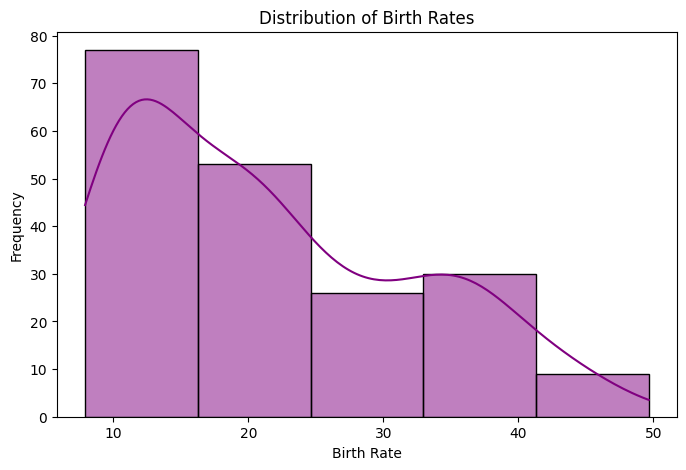

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(internet["Birth rate"], bins=5, kde=True, color='purple')
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Birth Rates")
plt.show()

<h2>2. The top 5 Countries with Highest Internet Usage

In [22]:
t5 = internet.nlargest(5, "Internet users")
t5

,Country Name,Country Code,Birth rate,Internet users,Income Group
84,Iceland,ISL,13.4,96.5468,High income
22,Bermuda,BMU,10.4,95.3000,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income
47,Denmark,DNK,10.0,94.6297,High income


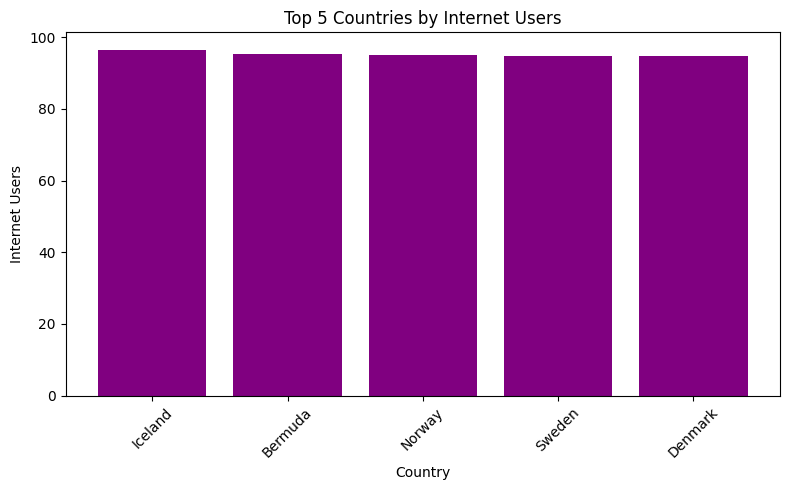

In [26]:
countries = t5["Country Name"]
internet_users = t5["Internet users"]

plt.figure(figsize=(8, 5))
plt.bar(countries, internet_users, color='purple')
plt.xlabel('Country')
plt.ylabel('Internet Users')
plt.title('Top 5 Countries by Internet Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>3. Count of Countries by Income Group</h2>

In [28]:
income_group = internet['Income Group'].value_counts()
income_group

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

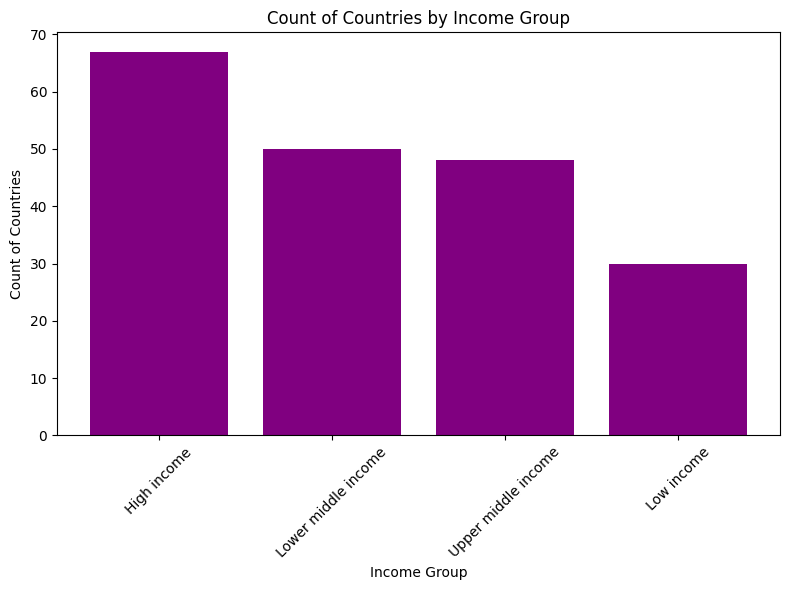

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(income_group.index, income_group.values, color='purple')
plt.xlabel('Income Group')
plt.ylabel('Count of Countries')
plt.title('Count of Countries by Income Group')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h2>4. Box Plot of Internet Usage</h2>

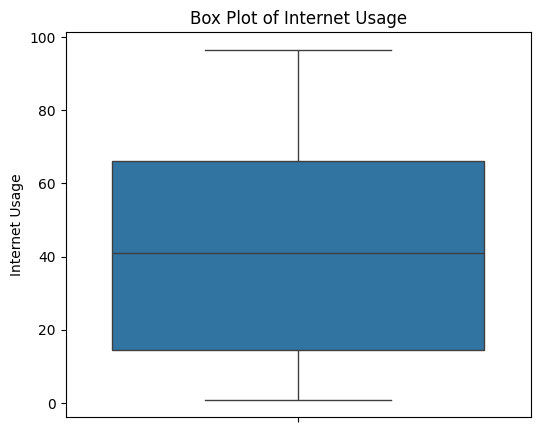

In [34]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=internet["Internet users"])
plt.ylabel("Internet Usage")
plt.title("Box Plot of Internet Usage")
plt.show()

<h2>5. Countries with No Internet Access </h2>

In [35]:
no_int = internet[internet["Internet users"] == 0]
print("Countries with No Internet Access:", no_int)

Countries with No Internet Access: Empty DataFrame
Columns: [Country Name, Country Code, Birth rate, Internet users, Income Group]
Index: []


<h2>6. Average Birth Rate</h2>

In [37]:
avg_br = internet["Birth rate"].mean()
print(f"Average Birth Rate: {avg_br:.2f}")

Average Birth Rate: 21.47


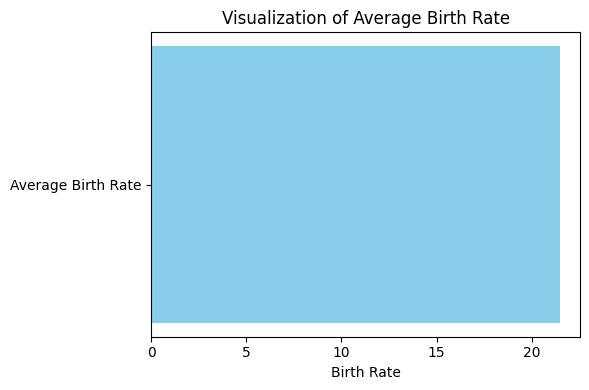

In [39]:
plt.figure(figsize=(6, 4))
plt.barh(["Average Birth Rate"], [avg_br], color="skyblue")
plt.xlabel("Birth Rate")
plt.title("Visualization of Average Birth Rate")
plt.tight_layout()
plt.show()

<h2>7. Scatter Plot: Birth Rate vs. Internet Usage</h2>

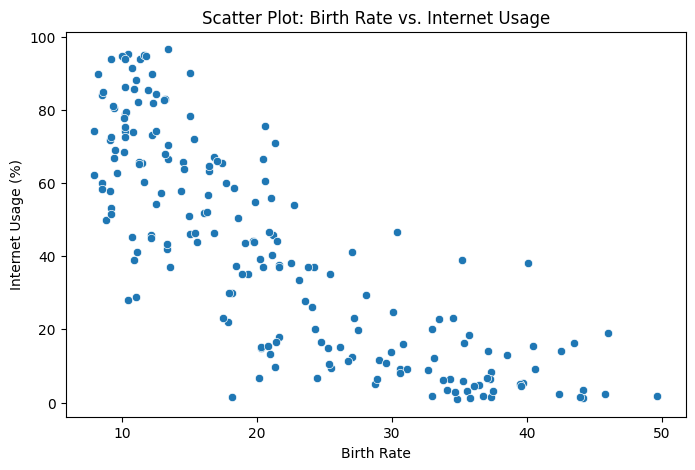

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Birth rate", y="Internet users", data=internet)
plt.xlabel("Birth Rate")
plt.ylabel("Internet Usage (%)")
plt.title("Scatter Plot: Birth Rate vs. Internet Usage")
plt.show()

<h2>8. Countries with Birth Rate Above 40</h2>

In [45]:
high_birthrate = internet[internet["Birth rate"] > 40]
print("Countries with Birth Rate Above 40: \n", high_birthrate)

Countries with Birth Rate Above 40: 
          Country Name Country Code  Birth rate  Internet users  \
2              Angola          AGO      45.985            19.1   
11            Burundi          BDI      44.151             1.3   
14       Burkina Faso          BFA      40.551             9.1   
65        Gambia, The          GMB      42.525            14.0   
115              Mali          MLI      44.138             3.5   
127             Niger          NER      49.661             1.7   
128           Nigeria          NGA      40.045            38.0   
156           Somalia          SOM      43.891             1.5   
167              Chad          TCD      45.745             2.3   
178            Uganda          UGA      43.474            16.2   
192  Congo, Dem. Rep.          COD      42.394             2.2   
193            Zambia          ZMB      40.471            15.4   

            Income Group  
2    Upper middle income  
11            Low income  
14            Low inco

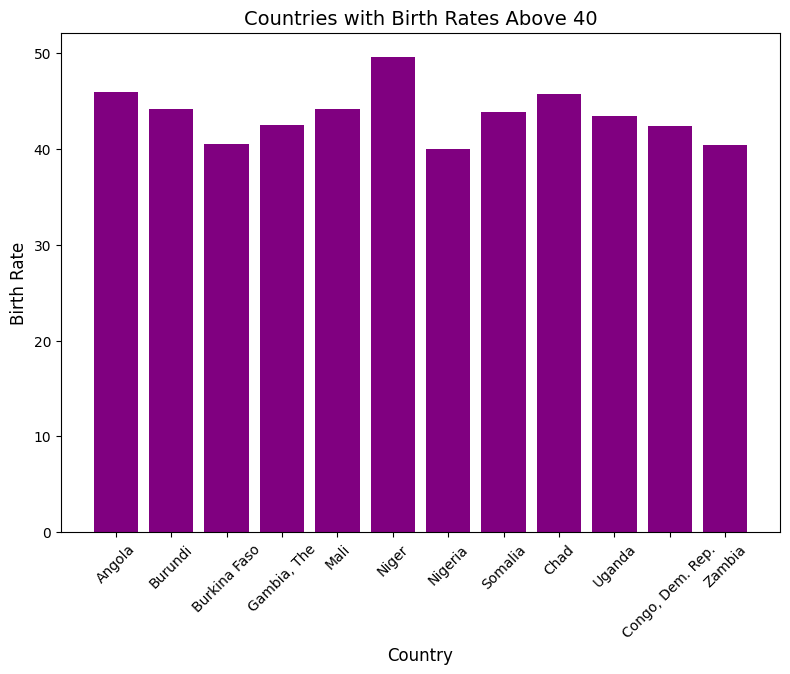

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(high_birthrate["Country Name"], high_birthrate["Birth rate"], color ='purple')
plt.title("Countries with Birth Rates Above 40", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Birth Rate", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h2>9. Pie Chart of Income Groups</h2>

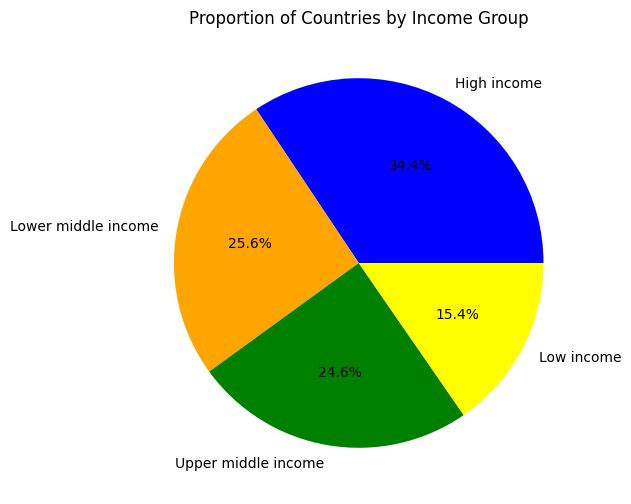

In [51]:
plt.figure(figsize=(6, 6))
internet["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'yellow'])
plt.title("Proportion of Countries by Income Group")
plt.ylabel("")  
plt.show()

<h2>10. Correlation Between Birth Rate and Internet Usage</h2>

In [53]:
correlation = internet["Birth rate"].corr(internet["Internet users"])
print(f"The correlation between Birth Rate and Internet Usage: {correlation:.2f}")

The correlation between Birth Rate and Internet Usage: -0.82
